# Feature based price prediction of Used Cars

## Data setup and import

In [50]:
import pandas as pd

In [51]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [52]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',names = headers)

In [53]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

# Data wrangling

In [55]:
import matplotlib.pylab as plt
import numpy as np

### Missing value imputation

In [56]:
df.replace("?",np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [57]:
# Check to see which all columns have null values
data = df.isnull()
for column in data.columns.values.tolist():
    print(column)
    print(data[column].value_counts())
    print('')

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

####  Replace missing values by mean and convert the column values to their respective types

In [58]:
nor_mean = df['normalized-losses'].astype(float).mean(axis = 0)
df['normalized-losses'].replace(np.nan,nor_mean,inplace = True)

In [59]:
df['bore'].replace(np.nan,df['bore'].astype(float).mean(axis = 0),inplace = True)

In [60]:
df['stroke'].replace(np.nan,df['stroke'].astype(float).mean(axis = 0),inplace = True)

In [61]:
df['horsepower'].replace(np.nan,df['horsepower'].astype(float).mean(axis = 0),inplace = True)

In [62]:
df['peak-rpm'].replace(np.nan,df['peak-rpm'].astype(float).mean(axis = 0),inplace = True)

In [63]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [64]:
df['num-of-doors'].replace(np.nan,df['num-of-doors'].value_counts().idxmax(),inplace = True)

In [65]:
df.dropna(inplace=True)
df['price'].isnull().value_counts()

False    201
Name: price, dtype: int64

In [66]:
df[['peak-rpm','bore','stroke']] = df[['peak-rpm','bore','stroke']].astype(float)

In [67]:
df['normalized-losses'] = df['normalized-losses'].astype(int)

In [68]:
df['price'] = df['price'].astype(float)

In [69]:
df[['peak-rpm','bore','stroke','normalized-losses','price']].dtypes
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


### Standardization

In [70]:
df['city-l/100km'] = 235/df['city-mpg']
#df.rename(columns={'city-mpg':'city-l/100km'},inplace=True)

In [71]:
df['highway-l/100km'] = 235/df['highway-mpg']
#df.rename(columns={'highway-mpg':'highway-l/100km'},inplace=True)

### Normalization

In [72]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
#df['height'] = df['height']/df['height'].max()
df[['length','width']].head()

,length,width
0,0.811148,0.890278
1,0.811148,0.890278
2,0.822681,0.909722
3,0.848630,0.919444
4,0.848630,0.922222


In [73]:
df['horsepower'] = df['horsepower'].astype(int)

### Binning

In [74]:
bin_val = np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)
grp = ['low','mid','high']
df['binned_values'] = pd.cut(df['horsepower'],bin_val,labels = grp,include_lowest=True)
df['binned_values'].value_counts()

low     153
mid      43
high      5
Name: binned_values, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

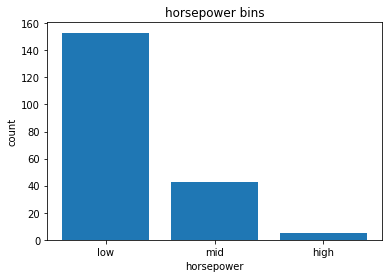

In [75]:
%matplotlib inline
plt.bar(grp, df["binned_values"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

### Dummies method

#### Regression analysis cannot take words as input so they have to be converted into dummy values to use them as input

In [76]:
dummy1 = pd.get_dummies(df['fuel-type'])
dummy1.rename(columns = {'fuel-type-gas':'diesel','fuel-type-diesel':'diesel'},inplace = True)
dummy1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [77]:
df = pd.concat([df,dummy1],axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

In [78]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km,binned_values,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,mid,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,low,0,1


# Exploratory Data analysis

In [81]:
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [82]:
# correlation of different columns with price column
cor_val = df.corr()
cor_val[(cor_val.loc['price']>0.5) | (cor_val.loc['price']< -0.5)]['price']

wheel-base         0.584642
length             0.690628
width              0.751265
curb-weight        0.834415
engine-size        0.872335
bore               0.543155
horsepower         0.809607
city-mpg          -0.686571
highway-mpg       -0.704692
price              1.000000
city-l/100km       0.789898
highway-l/100km    0.801118
Name: price, dtype: float64

(0, 56082.125898961196)

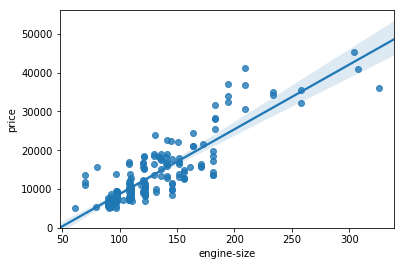

In [84]:
# Engine size as potential predictor variable of price
sb.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

 As engine size is positively correlated with price it seems better predictor

(0, 48294.42429196097)

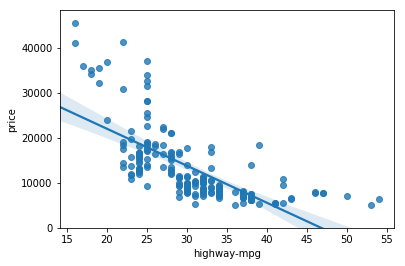

In [85]:
# regression plot for price vs highway-mpg
sb.regplot(x= 'highway-mpg',y = 'price',data = df)
plt.ylim(0,)  

Highway-mpg feature is negatively correlated with price so even it is a better predictor of price

In [87]:
# highway column is negatively and linearly correlated with price 
df[['highway-mpg','price']].corr().iloc[0,1]

-0.7046922650589532

In [89]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


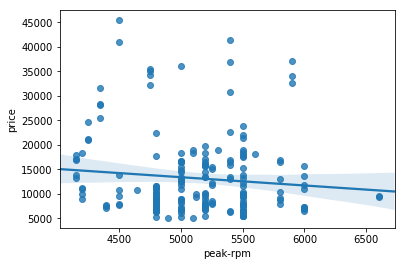

In [90]:
# peak rpm is not much correlated with price as it has flat line
sb.regplot(x="peak-rpm", y="price", data=df)

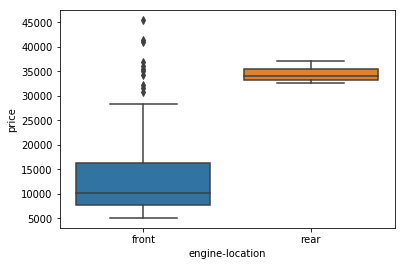

In [92]:
# categorical variables
sb.boxplot(x="engine-location", y="price", data=df)

Distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

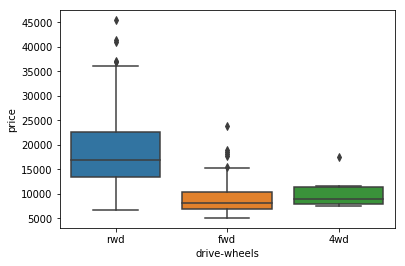

In [94]:
# drive-wheels vs price
sb.boxplot(x="drive-wheels", y="price", data=df)

Even here price distribution differs for each drive wheels which makes it a better predictor 

## Correlation using Pearson Co-efficient and P-value

In [95]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571052  with a P-value of P =  6.273536270651004e-48


Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

In [96]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048166e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [97]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936997e-53


<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

In [98]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

In [99]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935364e-17


Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

## Anova

In [100]:
grp_test = df[['drive-wheels','price']].groupby(['drive-wheels'])
grp_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
140,4wd,7603.0


In [101]:
f_val,p_val = stats.f_oneway(grp_test.get_group('4wd')['price'],grp_test.get_group('fwd')['price'],grp_test.get_group('rwd')['price'])
print('F score: ',f_val,'P value: ',p_val)

F score:  67.95406500780399 P value:  3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.

Important variables to take into account when predicting the car price

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

#  Model Development

In [103]:
df.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km,binned_values,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1


In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
# linear regression model building
lin = LinearRegression()
lin

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Simple Linear Regression

In [107]:
x = df[['highway-mpg']]
y = df['price']

In [108]:
# Train model
lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
# Predict model
yhat = lin.predict(x)
yhat[0:3]

array([16236.50464347, 16236.50464347, 17058.23802179])

In [110]:
lin.intercept_  #b0

38423.3058581574

In [111]:
lin.coef_ #b1

array([-821.73337832])

##### Estimated linear model
<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg

### Multivariate Linear Regression

In [135]:
X = df[['engine-size','highway-mpg','curb-weight','horsepower']]
lin.fit(X,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
lin.coef_ #b1 , b2, b3, b4

array([81.51280006, 36.1593925 ,  4.70805253, 53.53022809])

In [114]:
lin.intercept_ #b0

-15811.863767729214

<b>Price</b> = -15811.863767729214 + 53.53022809 x <b>horsepower</b> + 4.70805253 x <b>curb-weight</b> + 81.51280006 x <b>engine-size</b> + 36.1593925 x <b>highway-mpg</b>

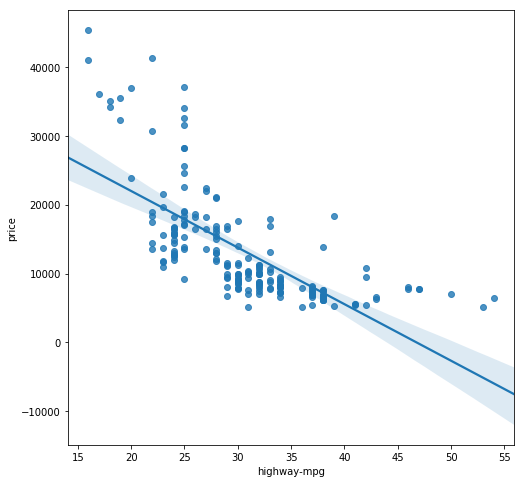

In [115]:
plt.figure(figsize=(8,8))
sb.regplot('highway-mpg','price',data = df)
plt.ylim = (0,)
plt.xlim =(6,)

In [116]:
df['price'].corr(df['highway-mpg'])

-0.7046922650589529

In [117]:
y_hat = lin.predict(X)

Text(0, 0.5, 'Proportion of Cars')

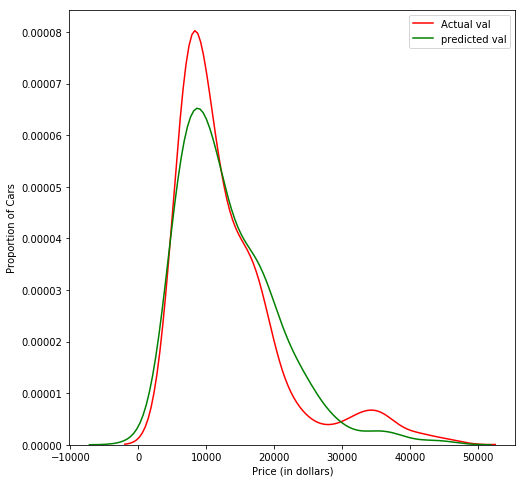

In [118]:
# plot of original vs predicted values
plt.figure(figsize=(8,8))
act = sb.distplot(df['price'],hist=False,color='r',label='Actual val')
sb.distplot(y_hat,hist=False,color='g',label='predicted val')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

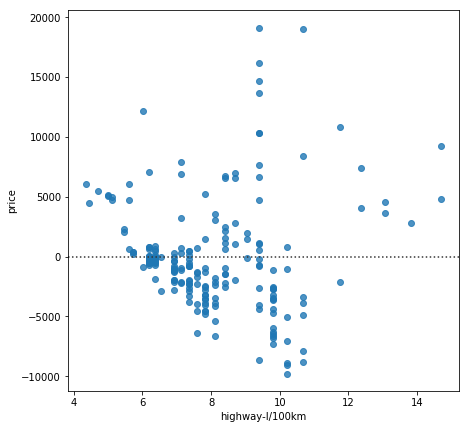

In [119]:
plt.figure(figsize=(7,7))
sb.residplot(df['highway-l/100km'], df['price'])
plt.show()

residuals are not randomly spread around the x-axis, so a non-linear model is more appropriate for this data

### Polynomial fit

In [121]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [122]:
x = df['highway-mpg']
y = df['price']

In [123]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


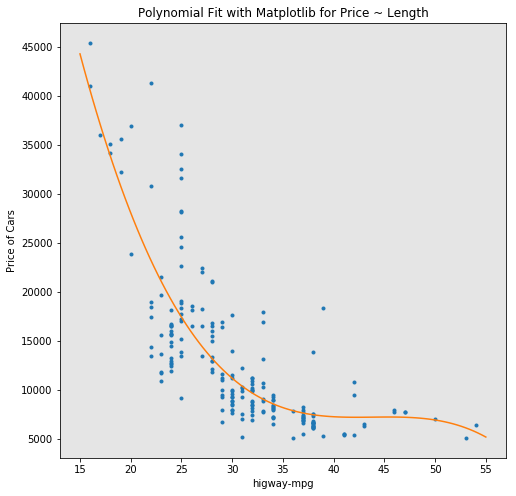

In [124]:
plt.figure(figsize=(8,8))
PlotPolly(p,x,y,'higway-mpg')

In [125]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [131]:
polyfun = PolynomialFeatures(degree=2)

In [132]:
pol_in = polyfun.fit_transform(X)

In [138]:
pol_in.shape

(201, 15)

In [139]:
X.shape

(201, 4)

### Pipeline

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [141]:
# pipline reduces all the task of preprocessing, training and prediction
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures()),('linear',LinearRegression())]

In [142]:
pip = Pipeline(Input)
pip.fit(X,df['price'])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [143]:
y_pip = pip.predict(X)
y_pip[0:5]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955,
       16135.53737535])

### Measures for insample evaluation
##### MSE 
##### R^2

In [144]:
x = df[['highway-mpg']]
y = df['price']
lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

##### SLR

In [146]:
lin.score(x,y) #49.65% of variation of price is explained by this linear regression model

0.4965911884339176

In [147]:
lin.predict(x)[:6]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011])

In [148]:
from sklearn.metrics import mean_squared_error

In [151]:
mse = mean_squared_error(df['price'],y_hat)
mse

11979300.349818882

##### MLR

In [152]:
lin.fit(X,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
lin.score(X,df['price']) #80.93% of variation of price is explained by this multiple linear regression model

0.8093732522175299

In [155]:
y_mul = lin.predict(X)

In [156]:
lin.predict(X).shape

(201,)

In [157]:
mean_squared_error(y_mul,df['price'])

11979300.34981888

##### polynomial model

In [158]:
from sklearn.metrics import r2_score

In [160]:
r2_score(y,p(x)) # 67.41% of the variation is explained by this polynomial fit

0.674194666390652

In [161]:
mean_squared_error(df['price'], p(x))

20474146.426361207

MLR is better fit for the data because it produces lesser MSE value than SLR and Poly also it produces Higher R^2 value  than other both models

# Model evaluation

In [216]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [163]:
df.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km,binned_values,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1


In [165]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,0,1


In [166]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [234]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(12,10))

    ax1 = sb.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sb.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [170]:
Y = df['price']
X = df.drop('price',axis = 1)


## Train and Test data

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
i_train,i_test,o_train,o_test = train_test_split(X,Y,test_size = 0.1)

In [173]:
i_test.shape

(21, 19)

In [174]:
i_train.shape

(180, 19)

In [175]:
o_test.shape

(21,)

In [176]:
o_train.shape

(180,)

In [177]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [178]:
lin.fit(i_train[['horsepower']],o_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [179]:
lin.score(i_train[['horsepower']],o_train)

0.662028747521533

In [180]:
lin.score(i_test[['horsepower']],o_test)

0.3635480624962414

### Cross validation score

In [181]:
from sklearn.model_selection import cross_val_score
r_val = cross_val_score(lin,X[['horsepower']],Y,cv=4)

In [182]:
r_val

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [183]:
r_val.mean()

0.5220592359225414

In [184]:
r_val.std()

0.2913048066611844

In [185]:
r_val = cross_val_score(lin,X[['horsepower']],Y,cv=4,scoring='neg_mean_squared_error')

In [186]:
-1*r_val

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976653])

In [187]:
from sklearn.model_selection import cross_val_predict

In [188]:
yhat = cross_val_predict(lin,X[['horsepower']],Y,cv= 4)
yhat[0:4]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ])

In [189]:
yhat.mean()

13200.539035413229

## Overfitting, Underfitting

In [194]:
mlr = LinearRegression()

In [195]:
mlr.fit(i_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],o_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [196]:
yhat_train = mlr.predict(i_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) #traing prediction
yhat_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

In [197]:
yhat_test = mlr.predict(i_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])# testing prediction
yhat_test[0:5]

array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

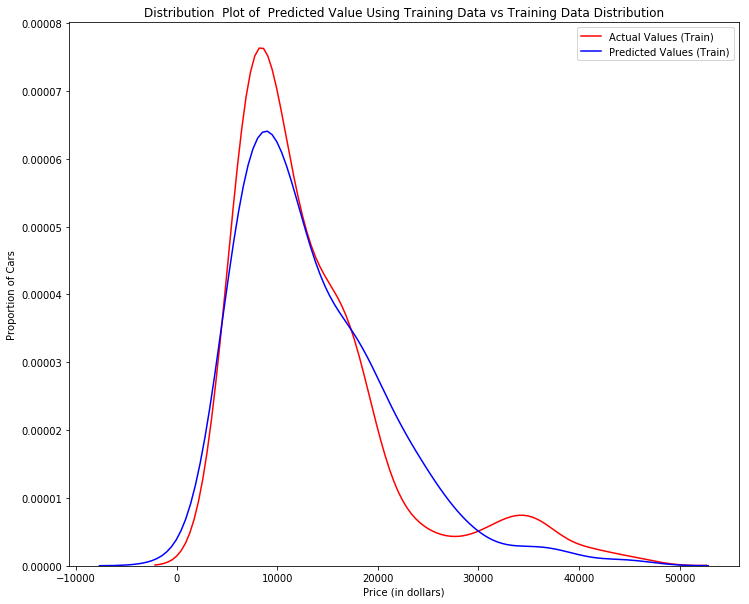

In [200]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(o_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

#### Model has performed well for train data as both curves match to each other

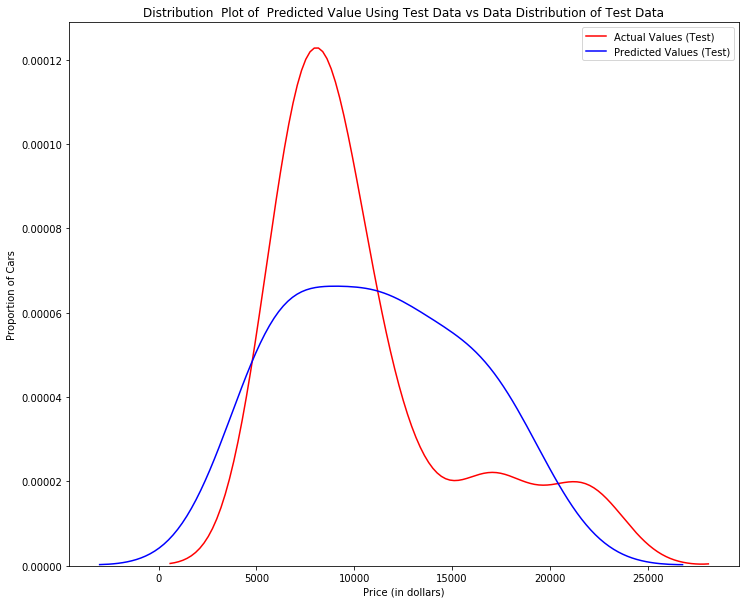

In [201]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(o_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [202]:
from sklearn.preprocessing import PolynomialFeatures

In [218]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.45,random_state = 0) # split
x_train.shape

(110, 19)

In [219]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])                         # Transform
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [212]:
poly = LinearRegression()                                             # train
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [220]:
y = poly.predict(x_test_pr)
y[0:4]

array([ 7035.72584448,  7594.70340643, 11863.48499312, 19685.21255285])

In [224]:
print("Predicted values:", y[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7035.72584448  7594.70340643 11863.48499312 19685.21255285]
True values: [ 6295. 10698. 13860. 13499.]


4

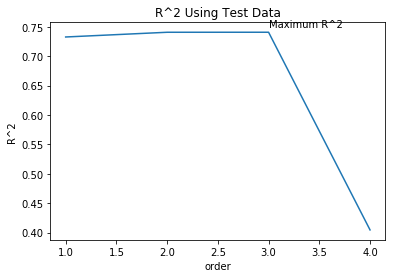

In [229]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lin.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lin.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    
len(Rsqu_test)

## Ridge regression

In [244]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [245]:
from sklearn.linear_model import Ridge

In [246]:
RigeModel=Ridge(alpha=0.5)

In [247]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [248]:
yhat = RigeModel.predict(x_test_pr)
yhat[0:3]

array([ 6571.22012486,  9625.36495893, 20910.19141584])

In [249]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6571.22012486  9625.36495893 20910.19141584 19376.12834306]
test set : [ 6295. 10698. 13860. 13499.]


In [250]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

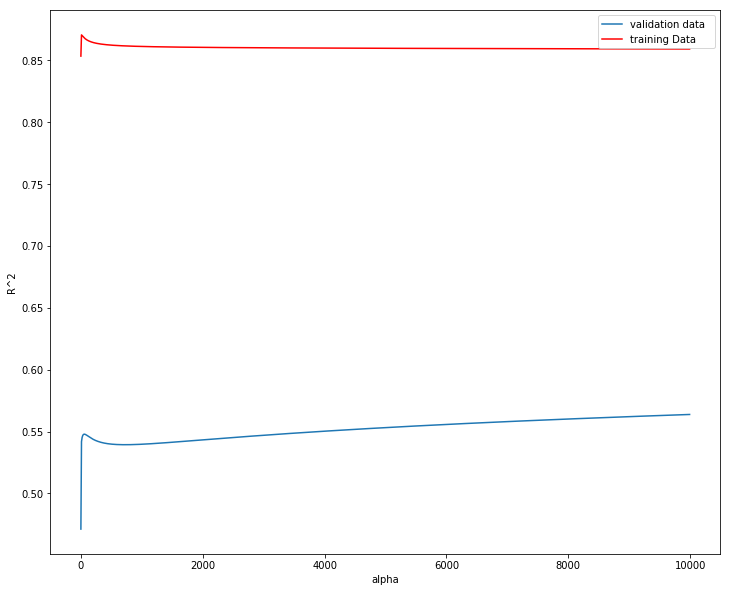

In [251]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The red line represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

## Grid search

##### GridsearchCV helps in determining best and otimized parameters for the model

In [252]:
from sklearn.model_selection import GridSearchCV

In [259]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [260]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [261]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [262]:
Grid1.fit(X[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],Y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [263]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [267]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411781387793231